<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab 3.02: Statistical Modeling and Model Validation

> Authors: Tim Book, Matt Brems

---

## Objective
The goal of this lab is to guide you through the modeling workflow to produce the best model you can. In this lesson, you will follow all best practices when slicing your data and validating your model. 

## Imports

In [906]:
# Import everything you need here.
# You may want to return to this cell to import more things later in the lab.
# DO NOT COPY AND PASTE FROM OUR CLASS SLIDES!
# Muscle memory is important!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score


## Read Data
The `citibike` dataset consists of Citi Bike ridership data for over 224,000 rides in February 2014.

In [907]:
# Read in the citibike data in the data folder in this repository.

df = pd.read_csv('./data/citibike_feb2014.csv')

## Explore the data
Use this space to familiarize yourself with the data.

Convince yourself there are no issues with the data. If you find any issues, clean them here.

In [908]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1


In [909]:
df.shape

(224736, 15)

In [910]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224736 entries, 0 to 224735
Data columns (total 15 columns):
tripduration               224736 non-null int64
starttime                  224736 non-null object
stoptime                   224736 non-null object
start station id           224736 non-null int64
start station name         224736 non-null object
start station latitude     224736 non-null float64
start station longitude    224736 non-null float64
end station id             224736 non-null int64
end station name           224736 non-null object
end station latitude       224736 non-null float64
end station longitude      224736 non-null float64
bikeid                     224736 non-null int64
usertype                   224736 non-null object
birth year                 224736 non-null object
gender                     224736 non-null int64
dtypes: float64(4), int64(5), object(6)
memory usage: 25.7+ MB


In [911]:
df.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [912]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender
count,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000
mean,874.519810,439.203479,40.734366,-73.990386,440.741995,40.734221,-73.990521,18010.598222,1.154617
std,5486.092219,335.723861,0.019031,0.011853,341.497433,0.019048,0.011920,1987.769335,0.436592
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,0.000000
25%,360.000000,305.000000,40.721854,-73.998522,305.000000,40.721816,-73.999061,16302.000000,1.000000
50%,544.000000,403.000000,40.736197,-73.990617,403.000000,40.735877,-73.990741,17975.000000,1.000000
75%,845.000000,490.000000,40.749156,-73.981918,488.000000,40.749013,-73.981948,19689.000000,1.000000
max,766108.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,21542.000000,2.000000


In [913]:
# Rename columns:

df.rename(columns= {'start station id':'start_station_id',
                    'start station name':'station_name',
                    'start station latitude':'start_station_lat',
                    'start station longitude':'start_station_lon',
                    'end station id':'end_station_id',
                    'end station latitude':'end_station_lat',
                    'end station longitude': 'end_station_lon',
                    'birth year': 'birth_year'}, inplace = True)

In [914]:
# Function in investigate unique values of a column:

def investigate_col(dataframe, column_name):
    #column_name = dataframe['column_name']
    unique_vals = pd.unique(dataframe['column_name'])
    value_counts = dataframe['column_name'].value_counts()
    nunique = dataframe['column_name'].nunique()
    
    print(f'Number of Unique Values: {nunique}')
    print(f'Value Counts:            {value_counts}')
    print(f'Unique Values:           {unique_vals}')


In [915]:
#pd.unique(df['start_station_id'])
df['usertype'].value_counts()
#df['start_station_id'].nunique()

Subscriber    218019
Customer        6717
Name: usertype, dtype: int64

In [916]:
# Cleaning and addressing issues with data:

# 1. Investigate Tripduration (in seconds): 
#        - Max value is 766108. Given the median of 544 seconds (9 miniutes), regardless of minuites or seconds, this seems off.
#        - Visualize 
#        - Take log of tripduration
#        - Remove observations 3stdv above mean ( trips > ~4.7 hours): n - 495
#        - It's conceivable that these ouitliers are bikes that left the meter running, were stolen, lost, etc.

# 2. Investigate station IDs:
#        - 329 unique IDs for both start and end stations, and station names.
#.       - All observations are integers

# 3. Investigate bikeid:
#        - 5699 unique values--all integers--some appear in the data only once.

# 4. Investigate gender:
#        - 3 values: 1,2,0; 176,526, 41,479, 6,731
#        - Generate indicator variables. 

# 5. Investigate birthyear (should be an integer):
#        - There's an errant '/N' hidden in here. Changed to NaN values. NaN = 6,717
#        - A user here was born in 1899. Seems ...unlikely. 

In [917]:
# Use log of trip duration to account for outliers, observe distribution:

df['log_tripduration'] = np.log(df['tripduration'])


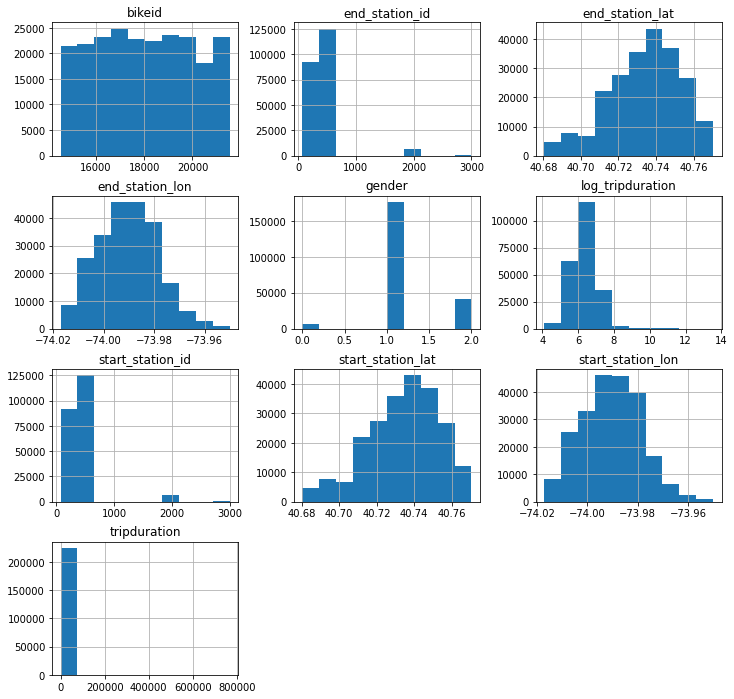

In [918]:
# Histogram of numeric variables:

df.hist(figsize = (12,12));

# The log of trip duration still seems right-skewed. Drop if trip duration is 3 standard deviations above the mean?

In [919]:
# Drop if trip duration is 3 standard deviations above the mean (about 4.7 hours): 

df = df[df.tripduration < (df.tripduration.mean()+(5486*3))]

# Drops 495 observatins (n - 495)

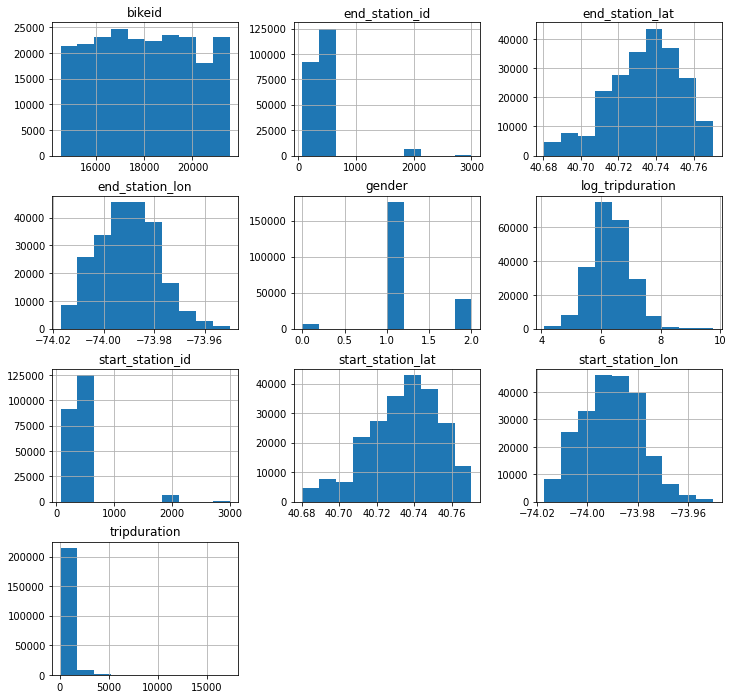

In [920]:
# Histogram of numeric variables with new log_tripduration variable:

df.hist(figsize = (12,12));

In [921]:
#  Clean '\\N' in birth_year column to NaNs:

def clean_birth_year(birth_year):
    if birth_year == '\\N':
        return np.nan
    else:
        return int(birth_year)
    
df['birth_year'] = df['birth_year'].map(clean_birth_year)

In [922]:
# Drop where birth_year = NaN

df = df[df.birth_year != 'NaN']

In [923]:
# Drop where birth_year < 1914 ... skeptical of citibike-riding nonagenarians 

df = df[df.birth_year > 1914]

In [924]:
# Generate indicator variables for Gender:

df = pd.get_dummies(df, columns=['gender'])

## Is average trip duration different by gender?

Conduct a hypothesis test that checks whether or not the average trip duration is different for `gender=1` and `gender=2`. Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly!

In [925]:
# Import scipy.stats:

from scipy import stats

In [926]:
# H-0: We do not expect to observe a difference in trip duration between gender 1 and gender 2
# H-A: We do expect to observe a difference in trip duration between gender 1 and gender 2

In [927]:
# Conduct t-test using trip duration in seconds:

trip_gender_1 = df.loc[df['gender_1']==1, 'tripduration']
trip_gender_2 = df.loc[df['gender_2']==1, 'tripduration']

stats.ttest_ind(trip_gender_1,trip_gender_2,equal_var=False)

Ttest_indResult(statistic=-27.809385263562767, pvalue=4.2432171276040137e-169)

In [928]:
# Conduct t-test using log of trip duration:

trip_gender_1 = df.loc[df['gender_1']==1, 'log_tripduration']
trip_gender_2 = df.loc[df['gender_2']==1, 'log_tripduration']

stats.ttest_ind(trip_gender_1,trip_gender_2,equal_var=False)

Ttest_indResult(statistic=-42.647186369823274, pvalue=0.0)

In [929]:
# Conclusion of t-tests:

# When using trip duration, we fail to reject the null hypopthesis, 
# and cannot claim that a statistically significant difference exists between the two
# groups with respect to trip duration.

# When using the log of trip duration, however, we can reject the null hypothesis,
# given the p-value of less than .05, suggesting a difference exists 
# between the two groups with respect to trip duration.

## What numeric columns shouldn't be treated as numeric?

**Answer:** Start and end station IDs are categorical in nature, and bike ID is a unique identifier. None of these variables should be treated as numeric.

## Dummify the `start station id` Variable

In [930]:
# This seems like a lot, but OK! 

df = pd.get_dummies(df, columns=['start_station_id'])

# Wouldn't it a better predictor of trip duration to use the 
# start/end lat/lon to compute the numeric distance for each trip 
# rather than using a categorical variable?  


In [931]:
# Concat station ID dummies to dataframe:



## Engineer a feature called `age` that shares how old the person would have been in 2014 (at the time the data was collected).

- Note: you will need to clean the data a bit.

In [933]:
# 2014 minus the year of birth = age

df['age'] = 2014 - df['birth_year']

## Split your data into train/test data

Look at the size of your data. What is a good proportion for your split? **Justify your answer.**

Use the `tripduration` column as your `y` variable.

For your `X` variables, use `age`, `usertype`, `gender`, and the dummy variables you created from `start station id`. (Hint: You may find the Pandas `.drop()` method helpful here.)

**NOTE:** When doing your train/test split, please use random seed 123.

In [934]:
# Generate dummy variable for usertype:

#df = pd.get_dummies(df, columns=['usertype'])
df['usertype'] = df.usertype.map({'Subscriber': 1, 'Customer': 0})

In [840]:
# Instantiate

lr = LinearRegression()

In [966]:
# Define feature matrix and target vector:

X = df.drop(columns=['starttime',
            'stoptime',
            'tripduration',
            'station_name',
            'start_station_lat',
            'start_station_lon',
            'end_station_id',
            'end station name',
            'end_station_lat',
            'end_station_lon',
            'bikeid',
            'birth_year',
            'log_tripduration',
            'gender_0',
            'gender_2']) 

In [967]:
y = df['tripduration']

In [968]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

## Fit a Linear Regression model in `sklearn` predicting `tripduration`.

In [969]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluate your model
Look at some evaluation metrics for **both** the training and test data. 
- How did your model do? Is it overfit, underfit, or neither?
- Does this model outperform the baseline? (e.g. setting $\hat{y}$ to be the mean of our training `y` values.)

In [970]:
# Train score
print('train', lr.score(X_train, y_train))
# Test score
print('test', lr.score(X_test, y_test))
# Cross val score
print('cross val', cross_val_score(lr, X_train, y_train, cv=5).mean())

# Code adapted from GA DSI 3.07 Lecture

train 0.029770590485383108
test 0.02666636963985936
cross val 0.024410176859133915


## Fit a Linear Regression model in `statsmodels` predicting `tripduration`.

In [971]:
# Import statsmodels
import statsmodels.api as sm

# Create and fit model
model = sm.OLS(y_train, X_train).fit()

## Using the `statsmodels` summary, test whether or not `age` has a significant effect when predicting `tripduration`.
- Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly **in the context of your model**!

In [972]:
# H0: Age does not have an effect on trip duration beyond what we
#     would expect to observe as a result random chance.

# HA: Age does have an effect on trip duration beyond what we would
#     expect to observe as a result of random chance.


# Generate summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tripduration   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     15.47
Date:                Mon, 06 Apr 2020   Prob (F-statistic):               0.00
Time:                        21:46:01   Log-Likelihood:            -1.2874e+06
No. Observations:              163088   AIC:                         2.575e+06
Df Residuals:                  162757   BIC:                         2.579e+06
Df Model:                         330                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
usertype                698.4465      6.880    101.523      0.000     684.962     711.931
gender_1               -106.0738      4.137    -25.637      0.000    -114.183     -97.965
start_station_id_72     212.6896     29.394      7.236      0.000     155.078     270.302
start_station_id_79     -66.1742     30.204     -2.191      0.028    -125.373      -6.976
start_station_id_82     -45.0381     45.622     -0.987      0.324    -134.457      44.380
start_station_id_83     126.6332     43.425      2.916      0.004      41.520     211.746
start_station_id_116   -111.1684     20.446     -5.437      0.000    -151.243     -71.094
start_station_id_119     10.0639    102.374      0.098      0.922    -190.587     210.715
start_station_id_120     67.2857     81.586      0.825      0.410     -92.622     227.193
start_station_id_127     12.0180     24.093      0.499      0.618     -35.204      59.240
start_station_id_128      8.0556     22.378      0.360      0.719     -35.805      51.916
start_station_id_137    -25.9038     33.580     -0.771      0.440     -91.721      39.913
start_station_id_143    -13.3132     55.161     -0.241      0.809    -121.428      94.802
start_station_id_144    215.1161     80.949      2.657      0.008      56.458     373.774
start_station_id_146   -142.1515     33.669     -4.222      0.000    -208.143     -76.161
start_station_id_147    -49.2174     24.916     -1.975      0.048     -98.052      -0.383
start_station_id_150    -72.1695     32.199     -2.241      0.025    -135.279      -9.060
start_station_id_151    -77.2370     18.082     -4.271      0.000    -112.678     -41.796
start_station_id_152    -46.5997     38.104     -1.223      0.221    -121.284      28.084
start_station_id_153   -134.9990     23.502     -5.744      0.000    -181.062     -88.936
start_station_id_157     73.0010     42.949      1.700      0.089     -11.178     157.180
start_station_id_160     -5.0746     30.365     -0.167      0.867     -64.589      54.440
start_station_id_161   -100.9233     22.098     -4.567      0.000    -144.235     -57.612
start_station_id_164    -42.0606     30.041     -1.400      0.161    -100.941      16.820
start_station_id_167    -44.3127     24.878     -1.781      0.075     -93.074       4.448
start_station_id_168   -126.9349     20.547     -6.178      0.000    -167.207     -86.662
start_station_id_173   -115.8113     24.243     -4.777      0.000    -163.326     -68.297
start_station_id_174     45.4988     26.562      1.713      0.087      -6.563      97.561
start_station_id_195     23.1999     29.100      0.797      0.425     -33.836      80.236
start_station_id_212    -68.2381     24.682     -2.765      0.006    -116.615     -19.861
start_station_id_216    159.4310     94.445      1.688      0.091     -25.679     344.542
start_station_id_217   

In [ ]:
# Based on the above output, though the p-value of age is less than .05 
# and we can reject the null hyothesis, the coefficient for age suggests 
# only that a 1-unit (year) increase in age is associated with a
# 2.8 unit (seconds) increase in travel duration. 

## Citi Bike is attempting to market to people who they think will ride their bike for a long time. Based on your modeling, what types of individuals should Citi Bike market toward?

In [ ]:
# Given the model outputs, gender 2 subscribers who are younger. 
# Gender 1 had a negative assocaition with trip duration based on 
# the coefficient value, all else being equal, while the subscriber
# usertype has a positive assocaition with trip duration based on the 
# coefficient value, all else being equal. Both of these variables, as
# well as age, were statisitcally significant at the p < .05 level.
